In [17]:
import pandas as pd
import pickle

# Rutas de los archivos
PATH_PRODUCTS = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/new_processed/products_data_enriched.pkl"
PATH_TEST = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/new_processed/test_data.pkl"
PATH_TRAIN = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/new_processed/train_data_enriched.pkl"
PATH_USERS = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/new_processed/user_data_enriched.csv"

In [5]:
# Funciones para cargar datos
def load_products(path):
    """Carga el dataset de productos."""
    with open(path, 'rb') as file:
        products = pickle.load(file)
    return pd.DataFrame(products)

def load_test_data(path):
    """Carga el dataset de test."""
    with open(path, 'rb') as file:
        test_data = pickle.load(file)
    return pd.DataFrame(test_data)

def load_train_data(path):
    """Carga el dataset de entrenamiento."""
    with open(path, 'rb') as file:
        train_data = pickle.load(file)
    return pd.DataFrame(train_data)

def load_user_data(path):
    """Carga el dataset de usuarios."""
    return pd.read_csv(path)

# Cargar los datos
products_df = load_products(PATH_PRODUCTS)
test_df = load_test_data(PATH_TEST)
train_df = load_train_data(PATH_TRAIN)
users_df = load_user_data(PATH_USERS)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f73da3d7670>>
Traceback (most recent call last):
  File "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/.env/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [9]:
# Mostrar los esquemas de los datasets
def inspect_datasets():
    print("Esquema del dataset de productos:")
    print(products_df.columns.tolist())
    print("\nEsquema del dataset de test:")
    print(test_df.columns.tolist())
    print("\nEsquema del dataset de entrenamiento:")
    print(train_df.columns.tolist())
    print("\nEsquema del dataset de usuarios:")
    print(users_df.columns.tolist())

inspect_datasets()

Esquema del dataset de productos:
['discount', 'embedding', 'partnumber', 'color_id', 'cod_section', 'family', 'popularity', 'discount_category', 'reduced_embedding', 'cluster', 'similar_products']

Esquema del dataset de test:
['session_id', 'date', 'timestamp_local', 'user_id', 'country', 'partnumber', 'device_type', 'pagetype']

Esquema del dataset de entrenamiento:
['session_id', 'date', 'timestamp_local', 'add_to_cart', 'user_id', 'country', 'partnumber', 'device_type', 'pagetype', 'hour', 'day_of_week', 'week', 'popularity', 'session_interactions', 'cluster', 'discount_category', 'similar_products']

Esquema del dataset de usuarios:
['user_id', 'country', 'R', 'F', 'M', 'R_segment', 'F_segment', 'M_segment', 'RFM_score', 'user_class', 'region']


In [10]:
# Análisis actualizado
def analyze_data():
    """Realiza análisis utilizando los esquemas conocidos."""
    # Información de productos
    unique_colors = products_df['color_id'].nunique()
    unique_families = products_df['family'].nunique()
    unique_sections = products_df['cod_section'].nunique()
    print(f"Productos únicos por color: {unique_colors}")
    print(f"Familias de productos únicas: {unique_families}")
    print(f"Secciones únicas: {unique_sections}")

    # Familias y colores más frecuentes
    print("Top 10 familias de productos:")
    print(products_df['family'].value_counts().head(10))
    print("Top 10 colores de productos:")
    print(products_df['color_id'].value_counts().head(10))

    # Información de usuarios
    print(f"Países únicos de usuarios: {users_df['country'].nunique()}")
    print("Top 10 países de usuarios:")
    print(users_df['country'].value_counts().head(10))

    # Interacciones por país en entrenamiento
    interactions_by_country = train_df.groupby('country')['session_id'].nunique().sort_values(ascending=False)
    print("Interacciones por país (top 10):")
    print(interactions_by_country.head(10))

    # Secuencias de interacciones
    repeated_families = train_df.merge(products_df, on='partnumber').groupby('user_id')['family'].apply(lambda x: x.value_counts().head(1))
    print("Familias más repetidas por usuario (top 10):")
    print(repeated_families.head(10))

    repeated_colors = train_df.merge(products_df, on='partnumber').groupby('user_id')['color_id'].apply(lambda x: x.value_counts().head(1))
    print("Colores más repetidos por usuario (top 10):")
    print(repeated_colors.head(10))

analyze_data()


Productos únicos por color: 638
Familias de productos únicas: 217
Secciones únicas: 4
Top 10 familias de productos:
family
73     4817
156    3572
51     3479
53     2559
15     1558
153    1536
146    1448
182     996
58      853
99      821
Name: count, dtype: int64
Top 10 colores de productos:
color_id
3      5725
64     3271
83     2711
397    1463
85     1371
152    1092
307    1050
20      988
135     986
72      874
Name: count, dtype: int64
Países únicos de usuarios: 93
Top 10 países de usuarios:
country
25    547028
46      1532
13      1137
39       865
20       812
34       736
7        581
24       518
68       346
6        321
Name: count, dtype: int64
Interacciones por país (top 10):
country
29    1268950
57    1201566
34    1200282
25     903413
Name: session_id, dtype: int64
Familias más repetidas por usuario (top 10):
user_id     
-1       53     5960770
 1       29           3
 2       188          7
 4       182          3
 5       53           7
 6       73         

In [11]:
import pandas as pd

# Análisis de usuarios no logueados
def analyze_unlogged_users(train_df, products_df):
    """Analiza los patrones de interacción de usuarios no logueados."""
    unlogged_interactions = train_df[train_df['user_id'] == -1]
    
    # Familias más populares para usuarios no logueados
    unlogged_families = unlogged_interactions.merge(products_df, on='partnumber').groupby('family')['session_id'].count().sort_values(ascending=False)
    print("Familias más populares para usuarios no logueados:")
    print(unlogged_families.head(10))

    # Colores más populares para usuarios no logueados
    unlogged_colors = unlogged_interactions.merge(products_df, on='partnumber').groupby('color_id')['session_id'].count().sort_values(ascending=False)
    print("Colores más populares para usuarios no logueados:")
    print(unlogged_colors.head(10))
    
    # Análisis por tipo de página
    pagetype_dist = unlogged_interactions['pagetype'].value_counts()
    print("Distribución por tipo de página para usuarios no logueados:")
    print(pagetype_dist)
    
    # Análisis por tipo de dispositivo
    device_dist = unlogged_interactions['device_type'].value_counts()
    print("Distribución por tipo de dispositivo para usuarios no logueados:")
    print(device_dist)

# Análisis por país y patrones generales
def analyze_country_patterns(train_df, products_df):
    """Analiza patrones específicos por país."""
    country_interactions = train_df.groupby('country')['session_id'].count().sort_values(ascending=False)
    print("Interacciones por país (top 10):")
    print(country_interactions.head(10))

    # Familias más populares por país (top 1 país)
    top_country = country_interactions.idxmax()
    top_country_interactions = train_df[train_df['country'] == top_country]
    top_country_families = top_country_interactions.merge(products_df, on='partnumber').groupby('family')['session_id'].count().sort_values(ascending=False)
    print(f"Familias más populares en el país {top_country}:")
    print(top_country_families.head(10))

    # Colores más populares por país (top 1 país)
    top_country_colors = top_country_interactions.merge(products_df, on='partnumber').groupby('color_id')['session_id'].count().sort_values(ascending=False)
    print(f"Colores más populares en el país {top_country}:")
    print(top_country_colors.head(10))

# Ejecutar análisis
analyze_unlogged_users(train_df, products_df)
analyze_country_patterns(train_df, products_df)


Familias más populares para usuarios no logueados:
family
53     5960770
73     3844336
51     3180918
156    2949410
153    1434029
182    1224135
146    1120531
29     1105848
13      601128
15      574403
Name: session_id, dtype: int64
Colores más populares para usuarios no logueados:
color_id
3      4559569
64     3168110
83     1941039
397     904754
85      877883
181     701001
53      695459
461     667687
346     642092
135     485843
Name: session_id, dtype: int64
Distribución por tipo de página para usuarios no logueados:
pagetype
 24    39446367
 8       117854
 6        85882
 19       17061
 16       13696
 7         7426
 1         3140
 17        1416
-1          483
 25         291
 20         262
 23         208
 10         124
 3          122
 5          114
 21         100
 12          43
 9           26
 14          20
 13          20
 26          19
 11          17
 15           6
 2            5
 22           4
 31           2
 29           1
 35           1
 33 

In [12]:
# Análisis para usuarios logueados
def analyze_logged_users(train_df, users_df, products_df):
    """Analiza atributos y patrones para usuarios logueados."""

    # Filtrar usuarios logueados
    logged_users = train_df[train_df['user_id'] != -1]
    
    # 1. Exploración de RFM_score, user_class y region
    rfm_distribution = users_df['RFM_score'].value_counts().sort_index()
    print("Distribución de RFM_score:")
    print(rfm_distribution)

    user_class_distribution = users_df['user_class'].value_counts()
    print("\nDistribución de user_class:")
    print(user_class_distribution)

    region_distribution = users_df['region'].value_counts()
    print("\nDistribución por región:")
    print(region_distribution)

    # 2. Patrones en el historial de interacciones
    # Familias más repetidas por usuario logueado
    repeated_families_logged = logged_users.merge(products_df, on='partnumber').groupby('user_id')['family'].apply(lambda x: x.value_counts().head(1))
    print("\nFamilias más repetidas por usuario logueado (top 10):")
    print(repeated_families_logged.head(10))

    # Colores más repetidos por usuario logueado
    repeated_colors_logged = logged_users.merge(products_df, on='partnumber').groupby('user_id')['color_id'].apply(lambda x: x.value_counts().head(1))
    print("\nColores más repetidos por usuario logueado (top 10):")
    print(repeated_colors_logged.head(10))

    # Promedio de interacciones por usuario
    avg_interactions = logged_users.groupby('user_id')['session_id'].count().mean()
    print(f"\nPromedio de interacciones por usuario logueado: {avg_interactions:.2f}")

    # 3. Revisar pagetype y device_type
    pagetype_dist_logged = logged_users['pagetype'].value_counts()
    print("\nDistribución por tipo de página para usuarios logueados:")
    print(pagetype_dist_logged)

    device_dist_logged = logged_users['device_type'].value_counts()
    print("\nDistribución por tipo de dispositivo para usuarios logueados:")
    print(device_dist_logged)

# Ejecutar análisis
analyze_logged_users(train_df, users_df, products_df)


Distribución de RFM_score:
RFM_score
3     26832
4     34904
5     50428
6     77367
7     78588
8     84103
9     86467
10    63606
11    38981
12    15730
Name: count, dtype: int64

Distribución de user_class:
user_class
Frecuente    249158
Ocasional    189531
Premium      118317
Name: count, dtype: int64

Distribución por región:
region
America    547050
Other        9920
Europe         36
Name: count, dtype: int64

Familias más repetidas por usuario logueado (top 10):
user_id     
1        29      3
2        188     7
4        182     3
5        53      7
6        73     14
7        13      8
10       53      1
11       73      3
16       142     6
18       146    10
Name: family, dtype: int64

Colores más repetidos por usuario logueado (top 10):
user_id     
1        248    1
2        64     5
4        85     2
5        3      4
6        148    7
7        3      3
10       371    1
11       85     2
16       468    2
18       3      4
Name: color_id, dtype: int64

Promedio de inte

### **Resumen del enfoque para los usuarios logueados y no logueados**

---

### **1. Usuarios no logueados**

#### **Características clave:**
- **Sin historial previo**:
  - No hay interacciones anteriores para personalizar.
  - Representan una gran cantidad de sesiones (identificadas con `user_id = -1`).
  
- **Patrones globales dominantes**:
  - Familias populares: `53`, `73`, `51`.
  - Colores populares: `3`, `64`, `83`.
  - `pagetype` dominante: `24`.
  - Dispositivo dominante: `1` (móvil).

#### **Estrategia:**
- **Recomendaciones basadas en popularidad**:
  - Utilizar familias y colores más populares globalmente como baseline.
  - Ejemplo: Mostrar productos de las familias y colores más demandados.

- **Segmentación por contexto**:
  - Ajustar las recomendaciones según:
    - **`pagetype`**: Optimizar para el tipo de página donde ocurre la interacción (especialmente `24`).
    - **`device_type`**: Diseñar experiencias móviles prioritarias (`device_type = 1`).

#### **Modelo sugerido**:
1. Baseline basado en tendencias globales (popularidad).
2. Incorporar atributos contextuales (`pagetype`, `device_type`, `country`).

---

### **2. Usuarios logueados**

#### **Características clave:**
- **Historial de interacciones**:
  - Los usuarios logueados tienen un promedio de `18.04` interacciones.
  - Mayor diversidad en familias y colores repetidos.

- **Segmentación avanzada**:
  - **`RFM_score`**: Usuarios distribuidos entre puntajes `3` y `12`.
  - **`user_class`**: Divididos en `Frecuente`, `Ocasional`, y `Premium`.
  - **`region`**: Predominan usuarios en `America`.

- **Contexto de interacción**:
  - `pagetype` dominante: `24`.
  - Dispositivo dominante: `1` (móvil).

#### **Estrategia:**
- **Recomendaciones personalizadas**:
  - Basadas en historial de interacciones: Utilizar familias y colores más repetidos por usuario.
  - Incorporar atributos como `similar_products` y `cluster` del dataset de productos.

- **Segmentación dinámica**:
  - Personalizar según `RFM_score`, `user_class`, y `region`.

- **Optimización por contexto**:
  - Ajustar las recomendaciones según `pagetype` y `device_type`.

#### **Modelo sugerido**:
1. **Híbrido colaborativo y basado en contenido**:
   - **Colaborativo**: Para capturar patrones de interacción entre usuarios similares.
   - **Basado en contenido**: Usar atributos de productos (`family`, `color_id`, `cluster`, etc.).
2. Incorporar segmentación dinámica (`RFM_score`, `user_class`).
3. Optimizar para contextos de interacción (`pagetype`, `device_type`).

---

### **Resumen comparativo**

| Aspecto                  | No logueados                          | Logueados                                 |
|--------------------------|----------------------------------------|-------------------------------------------|
| **Personalización**       | Basado en popularidad global          | Basado en historial y atributos avanzados |
| **Segmentación**          | `pagetype`, `device_type`, `country`  | `RFM_score`, `user_class`, `region`       |
| **Modelo principal**      | Basado en popularidad y contexto      | Híbrido colaborativo + contenido          |
| **Contexto prioritario**  | Página `24` y móvil (`device_type=1`) | Página `24` y móvil (`device_type=1`)     |



---

### **Consideraciones clave para los modelos y generación de predicciones**

Con base en los requisitos proporcionados, aseguraremos que:

1. **Formato del JSON**:
   - Las predicciones generadas se ajustarán al formato del archivo adjunto, incluyendo la estructura esperada por la hackathon.

2. **Cobertura de los `session_id`**:
   - Todos los `session_id` presentes en el dataset de prueba serán considerados.
   - Cada `session_id` tendrá 5 recomendaciones personalizadas.

3. **Recomendaciones únicas**:
   - Evitaremos repeticiones dentro de las recomendaciones de cada `session_id`.

---

### **Plan de generación de predicciones**

#### **Usuarios no logueados**
1. **Estrategia**:
   - Generar recomendaciones basadas en popularidad global de familias y colores.
   - Ajustar por contexto usando `pagetype` y `device_type` en el dataset de prueba.

2. **Pipeline**:
   - Cargar el dataset de prueba y filtrar sesiones de usuarios no logueados (`user_id = -1`).
   - Seleccionar los 5 productos más populares (sin repetición) para cada `session_id`, ajustados por atributos contextuales.

---

#### **Usuarios logueados**
1. **Estrategia**:
   - Utilizar un modelo híbrido que combine:
     - **Colaborativo**: Para capturar patrones basados en similitud con otros usuarios.
     - **Basado en contenido**: Para recomendar productos según atributos de usuario (`RFM_score`, `user_class`) y atributos de productos (`family`, `color_id`, etc.).

2. **Pipeline**:
   - Entrenar un modelo colaborativo con el conjunto de entrenamiento.
   - Filtrar atributos relevantes del dataset de productos y usuarios.
   - Generar 5 recomendaciones únicas por `session_id` en el dataset de prueba, personalizadas por historial y atributos contextuales.

---

### **Implementación del JSON**
El código para la generación de las predicciones asegurará:
1. **Estructura**:
   - `{"session_id": "session_1", "predictions": ["product_1", "product_2", ..., "product_5"]}`.

2. **Cobertura completa**:
   - Cada `session_id` del dataset de prueba estará presente.

3. **Validación**:
   - Asegurar que el archivo JSON pase el test de la hackathon.



---

---

In [13]:
import pandas as pd

# Cargar datasets
train_df = pd.read_pickle("/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/new_processed/train_data_enriched.pkl")
test_df = pd.read_pickle("/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/new_processed/test_data.pkl")

# Inspección del esquema de train_df
print("\nEsquema del conjunto de entrenamiento (train_df):")
print(train_df.info())
print("\nPrimeras filas del conjunto de entrenamiento:")
print(train_df.head())

# Inspección del esquema de test_df
print("\nEsquema del conjunto de prueba (test_df):")
print(test_df.info())
print("\nPrimeras filas del conjunto de prueba:")
print(test_df.head())



Esquema del conjunto de entrenamiento (train_df):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 17 columns):
 #   Column                Dtype         
---  ------                -----         
 0   session_id            int32         
 1   date                  datetime64[ns]
 2   timestamp_local       datetime64[ns]
 3   add_to_cart           int8          
 4   user_id               int32         
 5   country               int16         
 6   partnumber            int32         
 7   device_type           int8          
 8   pagetype              int16         
 9   hour                  int32         
 10  day_of_week           int32         
 11  week                  UInt32        
 12  popularity            int32         
 13  session_interactions  int16         
 14  cluster               int16         
 15  discount_category     object        
 16  similar_products      object        
dtypes: UInt32(1), datetime64[ns](2)


Análisis del conjunto de entrenamiento:

Distribución de usuarios (logueados vs no logueados):
count
True     320173
False     59880
Name: count, dtype: int64

Distribución de interacciones por usuario:
count    3.800530e+05
mean     1.224867e+02
std      6.438882e+04
min      1.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.900000e+01
max      3.969472e+07
Name: count, dtype: float64

Distribución de interacciones por producto:
count    41995.000000
mean      1108.499702
std       2726.980664
min          1.000000
25%          8.000000
50%        139.000000
75%        879.000000
max      60365.000000
Name: count, dtype: float64

Distribución de add_to_cart:
add_to_cart
0    43805662
1     2745783
Name: count, dtype: int64

Distribución de popularidad de productos:
count    4.655144e+07
mean     7.816888e+03
std      7.809000e+03
min      1.000000e+00
25%      2.130000e+03
50%      5.305000e+03
75%      1.088300e+04
max      6.036500e+04
Name: popularity, dtype: flo

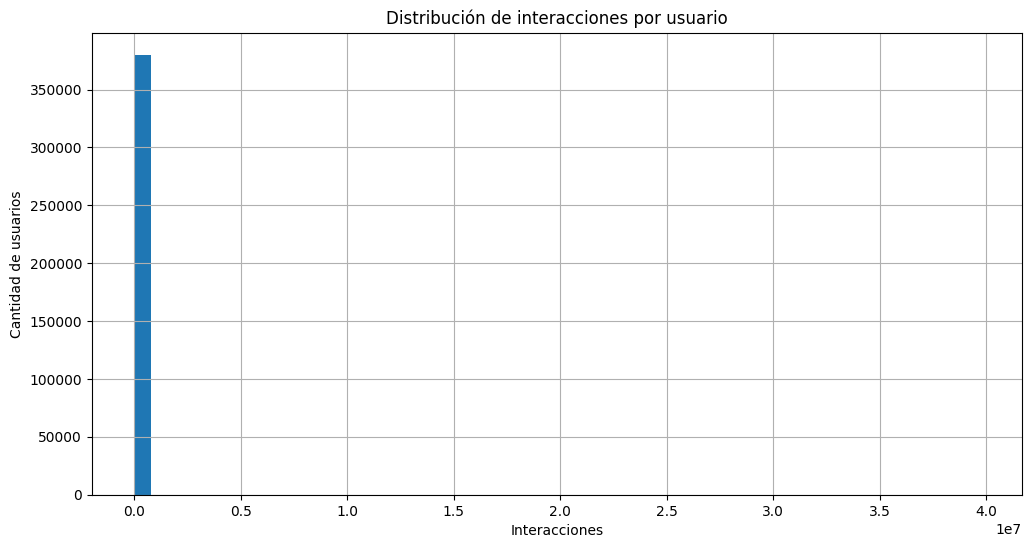

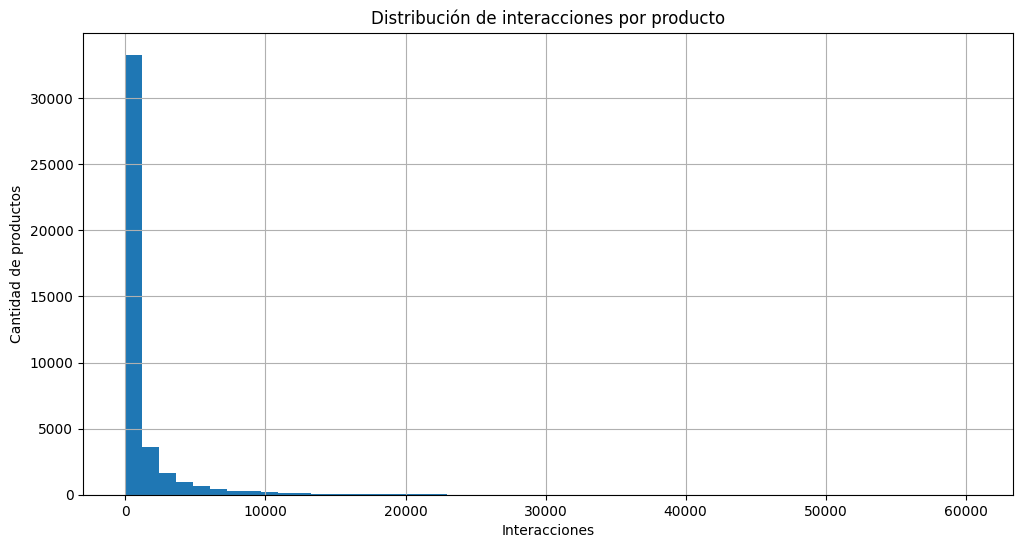

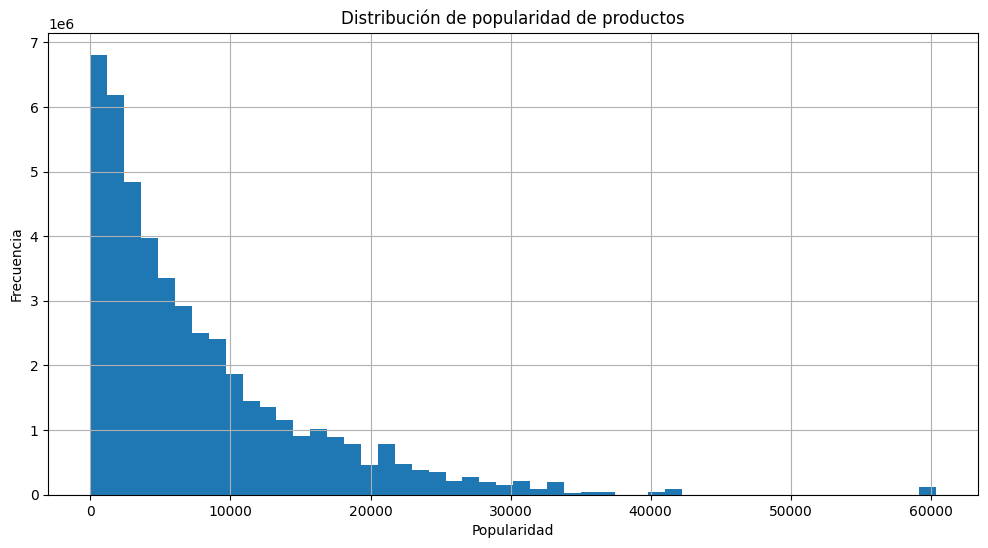


Análisis del conjunto de prueba:

Usuarios únicos en test_df:
Usuarios únicos: 1412

Productos únicos en test_df:
Productos únicos: 9253

Proporción de usuarios presentes en train_df:
Usuarios comunes: 496, Proporción: 35.13%

Proporción de productos presentes en train_df:
Productos comunes: 8983, Proporción: 97.08%


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datasets
train_df = pd.read_pickle("/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/new_processed/train_data_enriched.pkl")
test_df = pd.read_pickle("/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/new_processed/test_data.pkl")

# Análisis del conjunto de entrenamiento
def analyze_train_data(train_df):
    print("\nDistribución de usuarios (logueados vs no logueados):")
    user_distribution = train_df['user_id'].value_counts() > 1
    print(user_distribution.value_counts())

    print("\nDistribución de interacciones por usuario:")
    interactions_per_user = train_df['user_id'].value_counts()
    print(interactions_per_user.describe())

    print("\nDistribución de interacciones por producto:")
    interactions_per_product = train_df['partnumber'].value_counts()
    print(interactions_per_product.describe())

    print("\nDistribución de add_to_cart:")
    add_to_cart_distribution = train_df['add_to_cart'].value_counts()
    print(add_to_cart_distribution)

    print("\nDistribución de popularidad de productos:")
    print(train_df['popularity'].describe())

    print("\nDistribución de interacciones por país:")
    print(train_df['country'].value_counts().head(10))

    print("\nDistribución de tipos de página:")
    print(train_df['pagetype'].value_counts().head(10))

    print("\nDistribución de sesiones por usuario:")
    sessions_per_user = train_df.groupby('user_id')['session_id'].nunique()
    print(sessions_per_user.describe())

    # Visualización
    plt.figure(figsize=(12, 6))
    interactions_per_user.hist(bins=50)
    plt.title("Distribución de interacciones por usuario")
    plt.xlabel("Interacciones")
    plt.ylabel("Cantidad de usuarios")
    plt.show()

    plt.figure(figsize=(12, 6))
    interactions_per_product.hist(bins=50)
    plt.title("Distribución de interacciones por producto")
    plt.xlabel("Interacciones")
    plt.ylabel("Cantidad de productos")
    plt.show()

    plt.figure(figsize=(12, 6))
    train_df['popularity'].hist(bins=50)
    plt.title("Distribución de popularidad de productos")
    plt.xlabel("Popularidad")
    plt.ylabel("Frecuencia")
    plt.show()

# Análisis del conjunto de prueba
def analyze_test_data(test_df, train_df):
    print("\nUsuarios únicos en test_df:")
    unique_users_test = test_df['user_id'].nunique()
    print(f"Usuarios únicos: {unique_users_test}")

    print("\nProductos únicos en test_df:")
    unique_products_test = test_df['partnumber'].nunique()
    print(f"Productos únicos: {unique_products_test}")

    print("\nProporción de usuarios presentes en train_df:")
    train_users = set(train_df['user_id'].unique())
    test_users = set(test_df['user_id'].unique())
    common_users = len(train_users.intersection(test_users))
    print(f"Usuarios comunes: {common_users}, Proporción: {common_users / unique_users_test:.2%}")

    print("\nProporción de productos presentes en train_df:")
    train_products = set(train_df['partnumber'].unique())
    test_products = set(test_df['partnumber'].unique())
    common_products = len(train_products.intersection(test_products))
    print(f"Productos comunes: {common_products}, Proporción: {common_products / unique_products_test:.2%}")

# Ejecutar análisis
print("\nAnálisis del conjunto de entrenamiento:")
analyze_train_data(train_df)

print("\nAnálisis del conjunto de prueba:")
analyze_test_data(test_df, train_df)


A continuación, analicemos las gráficas y los resultados obtenidos del análisis exploratorio de los datasets para ajustar el modelo:

---

### **1. Distribución de interacciones por usuario**
- **Gráfica**: La gran mayoría de los usuarios tienen muy pocas interacciones, mientras que unos pocos tienen un número extremadamente alto, alcanzando valores de hasta 39 millones.
- **Conclusión**:
  - Existe un **desbalance extremo** en las interacciones por usuario.
  - Los usuarios con muchas interacciones podrían dominar el modelo si no se manejan adecuadamente. Es importante normalizar o usar técnicas como log-transform para evitar que estos casos sesguen el modelo.
  - Los usuarios con pocas interacciones serán desafiantes para un modelo basado en colaboraciones, ya que carecen de historial suficiente.

---

### **2. Distribución de interacciones por producto**
- **Gráfica**: La mayoría de los productos tienen pocas interacciones, mientras que unos pocos son extremadamente populares (hasta 60,000 interacciones).
- **Conclusión**:
  - Hay **productos muy populares** que probablemente funcionen bien en enfoques basados en popularidad.
  - Para productos menos interactuados, un modelo basado en contenido (usando características como color, familia, sección, embeddings) podría mejorar las recomendaciones.
  - Una estrategia híbrida es crucial para equilibrar recomendaciones entre productos populares y productos de nicho.

---

### **3. Distribución de popularidad de productos**
- **Gráfica**: Sigue un patrón de cola larga, con muchos productos de baja popularidad y unos pocos productos con valores extremadamente altos.
- **Conclusión**:
  - Este comportamiento también respalda un enfoque híbrido.
  - Los productos populares (alta frecuencia) pueden ser sesgados hacia recomendaciones frecuentes; se necesita un balance con productos más personalizados.

---

### **4. Distribución de `add_to_cart`**
- **Resultados**:
  - Solo el **5.89%** de las interacciones corresponden a productos añadidos al carrito.
  - Este **desbalance** es crítico: el modelo debe manejar la clase minoritaria (`add_to_cart=1`) adecuadamente.
- **Estrategia**:
  - Considerar **pesos para la clase minoritaria** en el entrenamiento.
  - Usar métricas como la **precisión balanceada** para evaluar el modelo.
  - Enfoques como submuestreo de la clase mayoritaria o sobreamplificación de la clase minoritaria podrían ser útiles.

---

### **5. Distribución por país y tipos de página**
- **Países**:
  - Cuatro países dominan las interacciones, lo que podría ser clave para personalización regional.
- **Tipos de página**:
  - La mayoría de las interacciones ocurren en la página tipo `24` (probablemente una página de detalles de productos).
  - Los tipos de página menos frecuentes (`1`, `16`, etc.) podrían ofrecer información valiosa sobre comportamientos específicos de los usuarios.

---

### **6. Distribución de sesiones por usuario**
- **Resultados**:
  - La mayoría de los usuarios tienen una única sesión registrada.
  - Sin embargo, algunos usuarios tienen millones de sesiones, lo que indica un desbalance extremo.
- **Conclusión**:
  - Este comportamiento sugiere que los datos no están igualmente distribuidos entre los usuarios.
  - Los usuarios frecuentes deben ser manejados cuidadosamente para evitar sesgos.

---

### **7. Análisis del conjunto de prueba**
- **Usuarios únicos**:
  - Solo el **35.13%** de los usuarios del conjunto de prueba están en el conjunto de entrenamiento.
  - Este es un desafío para un enfoque colaborativo puro, ya que el modelo necesitará manejar **usuarios nuevos** sin historial previo.
- **Productos únicos**:
  - El **97.08%** de los productos en el conjunto de prueba están presentes en el conjunto de entrenamiento.
  - Esto es favorable, ya que la mayoría de los productos tienen embeddings preexistentes que el modelo puede aprovechar.

---

### **Estrategia de adaptación del modelo**
1. **Manejar el desbalance en `add_to_cart`**:
   - Ajustar pesos de clase en la función de pérdida.
   - Submuestreo de interacciones no añadidas al carrito para balancear las clases.

2. **Usuarios con pocas interacciones**:
   - Implementar un enfoque basado en contenido para usuarios nuevos.
   - Aprovechar similitudes de productos y datos demográficos (como el país).

3. **Productos poco populares**:
   - Incorporar embeddings basados en contenido (color, familia, sección).
   - Diseñar una estrategia híbrida para priorizar productos de nicho y populares.

4. **Normalización de datos**:
   - Normalizar las interacciones y popularidad de productos.
   - Transformar variables con distribuciones extremas (log-transformation).

5. **Personalización regional**:
   - Incorporar la variable `country` como un factor en las recomendaciones.

6. **Manejo de tipos de página**:
   - Explorar patrones en las interacciones según el `pagetype`.
   - Podría ser útil segmentar el modelo según el tipo de página.


---

In [ ]:
import pandas as pd
import numpy as np
import json
from tensorflow.keras.models import load_model

# Cargar modelo
model = load_model("/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/models/recommender_model.keras")

# Cargar datos de prueba
test_df = pd.read_pickle("/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/new_processed/test_data.pkl")

# Mapear productos y usuarios
unique_users = test_df['user_id'].unique()
unique_items = test_df['partnumber'].unique()

user_mapping = {user: idx for idx, user in enumerate(unique_users)}
item_mapping = {item: idx for idx, item in enumerate(unique_items)}
reverse_item_mapping = {idx: item for item, idx in item_mapping.items()}

# Procesar datos de prueba
test_df['user_id'] = test_df['user_id'].map(user_mapping).fillna(-1).astype(int)
test_df['partnumber'] = test_df['partnumber'].map(item_mapping).fillna(-1).astype(int)
test_df['country'] = test_df['country'].astype('category').cat.codes
test_df['pagetype'] = test_df['pagetype'].astype('category').cat.codes

# Predicciones
predictions = {}
for session_id, group in test_df.groupby('session_id'):
    user_id = group['user_id'].iloc[0]
    if user_id == -1:  # Si el usuario no está mapeado
        user_embedding = np.zeros((1,))
    else:
        user_embedding = np.array([user_id])

    # Predecir productos no vistos
    unseen_items = [item_mapping[item] for item in unique_items if item not in group['partnumber'].values]
    scores = []

    for item in unseen_items:
        prediction = model.predict([
            np.array([user_id]),
            np.array([item]),
            np.array([group['country'].iloc[0]]),
            np.array([group['pagetype'].iloc[0]])
        ], verbose=0)
        scores.append((item, prediction[0][0]))

    # Obtener top 5 productos únicos
    top_items = [reverse_item_mapping[item] for item, _ in sorted(scores, key=lambda x: x[1], reverse=True)[:5]]
    predictions[str(session_id)] = top_items

# Validar que todos los session_id están presentes
missing_sessions = set(test_df['session_id'].unique()) - set(predictions.keys())
for missing_session in missing_sessions:
    predictions[str(missing_session)] = [0, 0, 0, 0, 0]  # Placeholder predicciones

# Guardar predicciones
output_path = "/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/predictions/predictions.json"
with open(output_path, "w") as f:
    json.dump({"target": predictions}, f, indent=4)

print(f"Predicciones guardadas en {output_path}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Cargar y ajustar el dataset
train_df = pd.read_pickle('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/new_processed/train_data_final.pkl')

# Seleccionar una muestra aleatoria del 10% del dataset para pruebas
sample_fraction = 0.1
train_df = train_df.sample(frac=sample_fraction, random_state=42)

# Reducción de características
train_df = train_df.drop(['discount', 'cod_section'], axis=1)

# Convertir columnas datetime a numéricas
train_df['date'] = pd.to_datetime(train_df['date']).astype(int) / 10**9
train_df['timestamp_local'] = pd.to_datetime(train_df['timestamp_local']).astype(int) / 10**9

# Balanceo de clases
majority = train_df[train_df['add_to_cart'] == 0]
minority = train_df[train_df['add_to_cart'] == 1]

majority_downsampled = majority.sample(n=len(minority), random_state=42)
balanced_train_df = pd.concat([majority_downsampled, minority])

# Separar características y etiquetas
X = balanced_train_df.drop('add_to_cart', axis=1)
y = balanced_train_df['add_to_cart']

# Codificar columnas categóricas y listas si existen
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object' or isinstance(X[column].iloc[0], list):
        le = LabelEncoder()
        X[column] = X[column].astype(str).apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le

# Dividir datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Generar interacciones
X_train['session_popularity'] = X_train['session_interactions'] * X_train['popularity']
X_val['session_popularity'] = X_val['session_interactions'] * X_val['popularity']

X_train['user_item'] = X_train['user_id'] * X_train['partnumber']
X_val['user_item'] = X_val['user_id'] * X_val['partnumber']

# Hiperparámetros para búsqueda aleatoria
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Modelo base
rf = RandomForestClassifier(random_state=42, n_jobs=4)

# Búsqueda aleatoria
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                               n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=4)

rf_random.fit(X_train, y_train)

# Mejor modelo
best_rf = rf_random.best_estimator_

# Predicciones
y_pred_proba = best_rf.predict_proba(X_val)[:, 1]
y_pred = best_rf.predict(X_val)

# Evaluación
roc_auc = roc_auc_score(y_val, y_pred_proba)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
mcc = matthews_corrcoef(y_val, y_pred)

print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)

# Curva ROC
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.show()

# Validación cruzada
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='roc_auc')
print("Validación cruzada AUC promedio:", np.mean(cv_scores))


---